<center>
<b><h1>TÉCNICAS DE INTELIGENCIA ARTIFICIAL</h1></b><br><br>
<h2><b>Taller de filtros</b></h2><br>
<h3><b>Docente:</b><br>
Daniel Vargas Medina<br> <br><br>
 <b>Presentan:</b><br>
Brian Camilo Saiz Cavanzo<br>
Camilo Esteban Zambrano Pereira <br><br>
<b>Fecha:</b><br>
1 de abril de 2022<br><br>
</h3></center>

In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize
%matplotlib inline

In [6]:
cancer = cv2.imread("fig/Cancer (4).tif", 0)
not_cancer = cv2.imread("fig/Not Cancer  (1).jpg", 0)

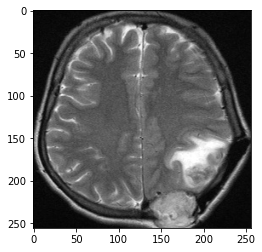

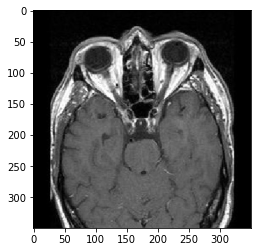

In [7]:
plt.imshow(cancer, cmap="gray")
plt.figure()
plt.imshow(not_cancer, cmap="gray")

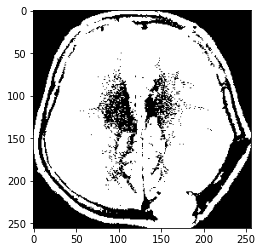

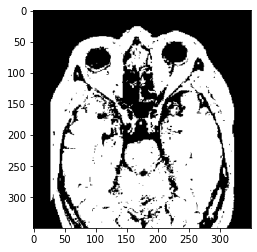

In [50]:
# Umbralización
cancer_umbral = cv2.adaptiveThreshold(cancer, 180, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 199, 5)
cancer_umbral[cancer_umbral==180] = 1
plt.imshow(cancer_umbral, cmap="gray")
not_cancer_umbral = cv2.adaptiveThreshold(not_cancer, 180, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 199, 5)
not_cancer_umbral[not_cancer_umbral==180] = 1
plt.figure()
plt.imshow(not_cancer_umbral, cmap="gray")


# Esqueleto

In [55]:
def skeleton(img):
    return skeletonize(img)

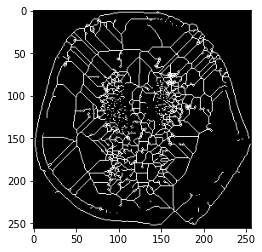

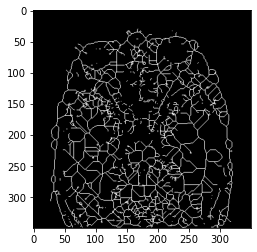

In [54]:
skel_cancer = skeleton(cancer_umbral)
skel_not_cancer = skeleton(not_cancer_umbral)
plt.imshow(skel_cancer, cmap="gray")
plt.figure()
plt.imshow(skel_not_cancer, cmap="gray")

# Adelgazamiento

In [57]:
from skimage.morphology import thin
def adelgazamiento(img):
    return thin(img)

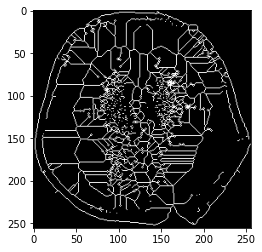

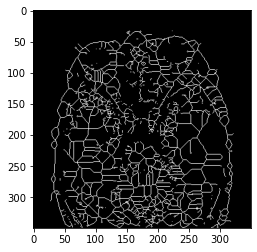

In [59]:
thin_cancer = adelgazamiento(cancer_umbral)
thin_not_cancer = adelgazamiento(not_cancer_umbral)
plt.imshow(thin_cancer, cmap="gray")
plt.figure()
plt.imshow(thin_not_cancer, cmap="gray")

# Dilatación

In [81]:
def dilatacion(img):
    methods = [cv2.MORPH_RECT, cv2.MORPH_ELLIPSE, cv2.MORPH_CROSS]
    kernels = [cv2.getStructuringElement(method, (5, 5)) for method in methods]
    return [cv2.dilate(img, kernel) for kernel in kernels]

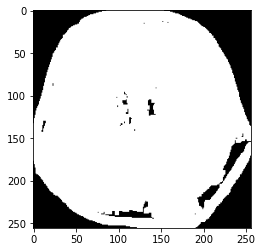

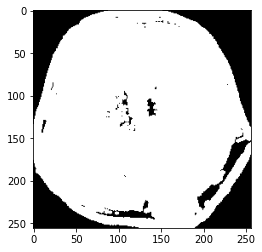

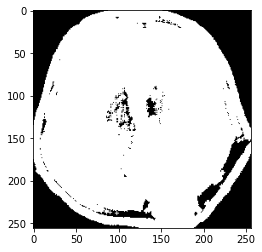

<Figure size 432x288 with 0 Axes>

In [83]:
cancer_dil = dilatacion(cancer_umbral)
for img in cancer_dil:
    plt.imshow(img, cmap="gray")
    plt.figure()

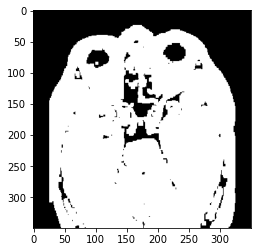

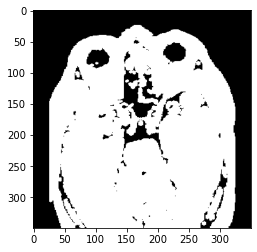

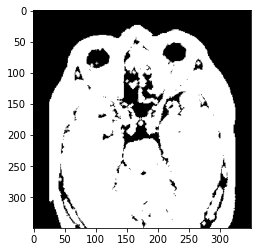

<Figure size 432x288 with 0 Axes>

In [84]:
not_cancer_dil = dilatacion(not_cancer_umbral)
for img in not_cancer_dil:
    plt.imshow(img, cmap="gray")
    plt.figure()

# Erosión